In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import os

In [2]:
X= io.mmread("/data-store/iplant/home/ruchikabhat/data/CellOracle/matrix.mtx")

In [3]:
adata =anndata.AnnData(X=X.transpose().tocsr())

In [4]:
adata

AnnData object with n_obs × n_vars = 24453 × 32285

In [5]:
metadata = pd.read_csv("/data-store/iplant/home/ruchikabhat/data/CellOracle/metadata.csv")

In [7]:
with open("/data-store/iplant/home/ruchikabhat/data/CellOracle/gene_names.csv",'r') as f:
      gene_names = f.read().splitlines()

In [8]:
adata.obs = metadata
adata.obs.index =adata.obs['barcode']
adata.var.index = gene_names

In [9]:
adata

AnnData object with n_obs × n_vars = 24453 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'Log10_nCount', 'Log10_nFeature', 'Sample', 'Condition', 'RNA_snn_res.0.8', 'seurat_clusters', 'Source', 'nCount_Protein', 'nFeature_Protein', 'Sub_Celltypes', 'Sub_Celltypes_2', 'Ref_celltypes', 'LBF_U', 'final_subtypes', 'updated_subtypes', 'Clusters', 'barcode', 'UMAP_1', 'UMAP_2'

In [12]:
pca =pd.read_csv("/data-store/iplant/home/ruchikabhat/data/CellOracle/pca.csv")
pca.index =adata.obs.index

In [13]:
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

In [14]:
adata

AnnData object with n_obs × n_vars = 24453 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'Log10_nCount', 'Log10_nFeature', 'Sample', 'Condition', 'RNA_snn_res.0.8', 'seurat_clusters', 'Source', 'nCount_Protein', 'nFeature_Protein', 'Sub_Celltypes', 'Sub_Celltypes_2', 'Ref_celltypes', 'LBF_U', 'final_subtypes', 'updated_subtypes', 'Clusters', 'barcode', 'UMAP_1', 'UMAP_2'
    obsm: 'X_pca', 'X_umap'

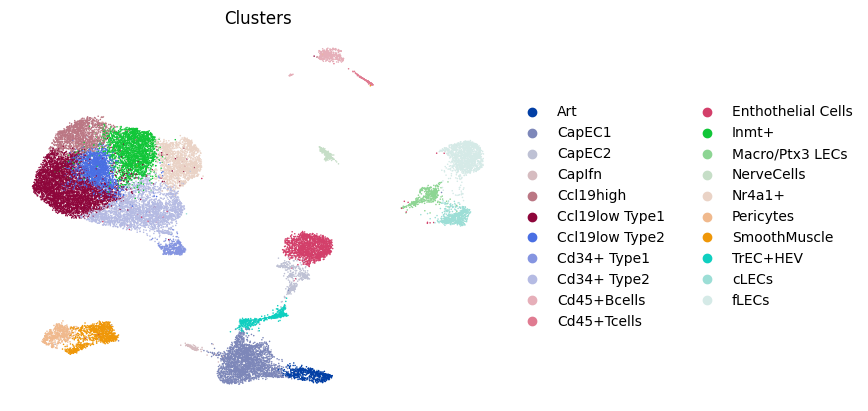

In [15]:
sc.pl.umap(adata, color =['Clusters'],frameon=False, save=True)

In [16]:
adata.write("/data-store/iplant/home/ruchikabhat/data/CellOracle/mouse.h5ad")

In [18]:
adata=sc.read_h5ad("/data-store/iplant/home/ruchikabhat/data/CellOracle/mouse.h5ad")